In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from dask_jobqueue import SLURMCluster
from dask.distributed import Client, progress
import xarray as xr
import sys
import os
from re import split
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from src.utils import get_pars_from_ini
location = split(', |_|-|!', os.popen('hostname').read())[0].replace("\n", "")
path_data = get_pars_from_ini(campaign='loc')[location]['path_data']
path_proj = get_pars_from_ini(campaign='loc')[location]['path_proj']
plt.style.use('seaborn')

In [2]:
zhh14 = pd.read_csv('../results/df_filtered/zhh14_merged_Wn_Ws.csv')
zhh14['time'] = pd.to_datetime(zhh14.time)
zhh14.index = zhh14.time
zhh14.drop(columns='time', inplace=True)
zhh14 = zhh14.assign(Location=1)

In [3]:
cols = list(zhh14.columns)

In [4]:
df_day = zhh14.groupby(zhh14.index.floor('d'))
flights = list(df_day.groups.keys())
dict_flights = {f'RF{i + 1:02d}':flights[i] for i in range(len(flights)) }
dict_fl = {flights[i]:f'RF{i + 1:02d}' for i in range(len(flights)) }

In [17]:
dict_fl

{Timestamp('2019-08-24 00:00:00'): 'RF01',
 Timestamp('2019-08-25 00:00:00'): 'RF02',
 Timestamp('2019-08-27 00:00:00'): 'RF03',
 Timestamp('2019-08-29 00:00:00'): 'RF04',
 Timestamp('2019-08-30 00:00:00'): 'RF05',
 Timestamp('2019-09-07 00:00:00'): 'RF06',
 Timestamp('2019-09-09 00:00:00'): 'RF07',
 Timestamp('2019-09-14 00:00:00'): 'RF08',
 Timestamp('2019-09-15 00:00:00'): 'RF09',
 Timestamp('2019-09-16 00:00:00'): 'RF10',
 Timestamp('2019-09-17 00:00:00'): 'RF11',
 Timestamp('2019-09-19 00:00:00'): 'RF12',
 Timestamp('2019-09-20 00:00:00'): 'RF13',
 Timestamp('2019-09-21 00:00:00'): 'RF14',
 Timestamp('2019-09-22 00:00:00'): 'RF15',
 Timestamp('2019-09-24 00:00:00'): 'RF16',
 Timestamp('2019-09-25 00:00:00'): 'RF17',
 Timestamp('2019-09-27 00:00:00'): 'RF18',
 Timestamp('2019-09-28 00:00:00'): 'RF19',
 Timestamp('2019-09-29 00:00:00'): 'RF20',
 Timestamp('2019-10-01 00:00:00'): 'RF21',
 Timestamp('2019-10-05 00:00:00'): 'RF22'}

In [5]:
zhh35 = pd.read_csv('../results/df_filtered/zhh35_merged_Wn_Ws.csv')
zhh35['time'] = pd.to_datetime(zhh35.time)
zhh35.index = zhh35.time
zhh35.drop(columns='time', inplace=True)
zhh35 = zhh35.assign(Location=2)

In [6]:
zhh95 = pd.read_csv('../results/df_filtered/zhh95.csv')
zhh95['time'] = pd.to_datetime(zhh95.time)
zhh95.index = zhh95.time
zhh95.drop(columns='time', inplace=True)
zhh95 = zhh95.assign(Location=3)


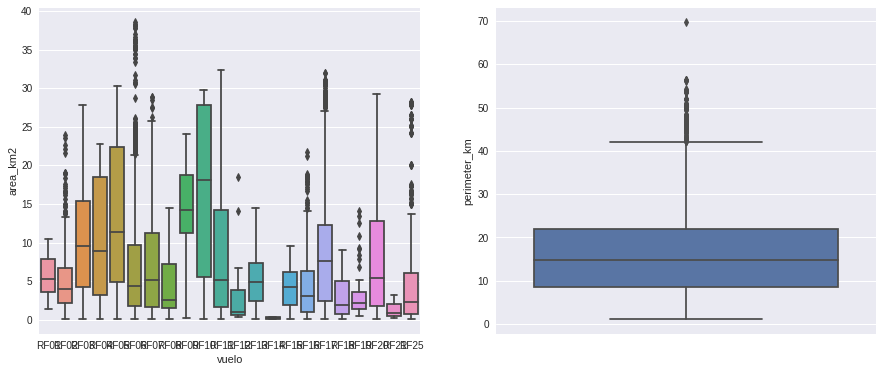

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
bxp1 = sns.boxplot(x='vuelo', y='area_km2',data=zhh14, ax=ax[0])
bxp2 = sns.boxplot(y='perimeter_km',data=zhh14, ax=ax[1])

In [8]:
cdf = pd.concat([zhh14, zhh35, zhh95])                             # CONCATENATE


<AxesSubplot:>

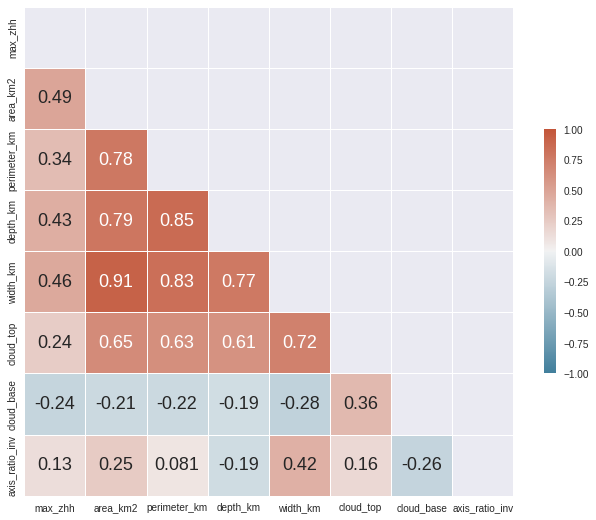

In [20]:
df_subset = zhh14[['max_zhh', 'area_km2', 'perimeter_km', 'depth_km', 'width_km',
       'cloud_top', 'cloud_base', 'axis_ratio_inv', 'vuelo']]

corr = df_subset.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))
plt.rcParams.update({'font.size': 18})
axis_font = {'size':'18'}
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,vmin=-1,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

<AxesSubplot:>

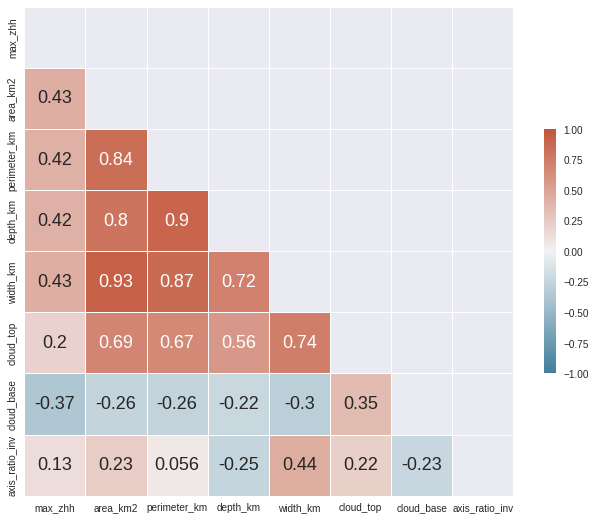

In [21]:
df_subset = zhh35[['max_zhh', 'area_km2', 'perimeter_km', 'depth_km', 'width_km',
       'cloud_top', 'cloud_base', 'axis_ratio_inv', 'vuelo']]

corr = df_subset.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))
plt.rcParams.update({'font.size': 18})
axis_font = {'size':'18'}
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,vmin=-1,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

<AxesSubplot:>

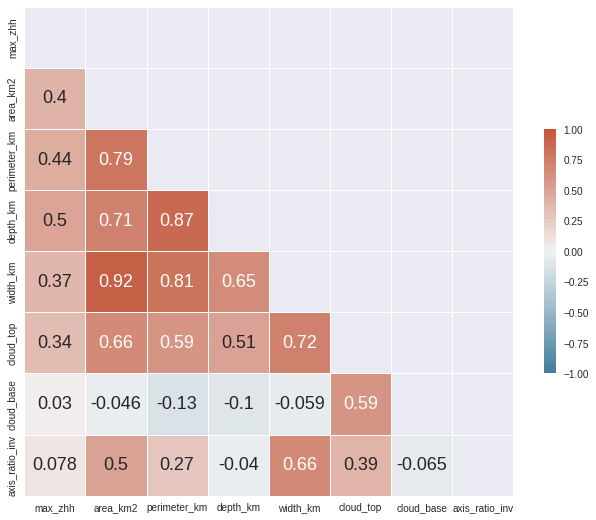

In [22]:
df_subset = zhh95[['max_zhh', 'area_km2', 'perimeter_km', 'depth_km', 'width_km',
       'cloud_top', 'cloud_base', 'axis_ratio_inv', 'vuelo']]

corr = df_subset.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))
plt.rcParams.update({'font.size': 18})
axis_font = {'size':'18'}
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,vmin=-1,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)